In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

In [2]:
data = pd.read_csv("Fraud.csv")

In [4]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


***
step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

amount - amount of the transaction in local currency.

nameOrig - customer who started the transaction

oldbalanceOrg - initial balance before the transaction

newbalanceOrig - new balance after the transaction

nameDest - customer who is the recipient of the transaction

oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.
***


***Checking if data has any Null Values***


In [5]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [7]:
describe = data.describe().T
describe['Skew'] = data.skew()
describe['kurtosis'] = data.kurtosis()
describe

C:\Users\DELL\AppData\Local\Temp\ipykernel_8316\846381482.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  describe['Skew'] = data.skew()
C:\Users\DELL\AppData\Local\Temp\ipykernel_8316\846381482.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  describe['kurtosis'] = data.kurtosis()


,count,mean,std,min,25%,50%,75%,max,Skew,kurtosis
step,6362620.0,2.433972e+02,1.423320e+02,1.0,156.00,239.000,3.350000e+02,7.430000e+02,0.375177,0.329071
amount,6362620.0,1.798619e+05,6.038582e+05,0.0,13389.57,74871.940,2.087215e+05,9.244552e+07,30.993949,1797.956705
oldbalanceOrg,6362620.0,8.338831e+05,2.888243e+06,0.0,0.00,14208.000,1.073152e+05,5.958504e+07,5.249136,32.964879
newbalanceOrig,6362620.0,8.551137e+05,2.924049e+06,0.0,0.00,0.000,1.442584e+05,4.958504e+07,5.176884,32.066985
oldbalanceDest,6362620.0,1.100702e+06,3.399180e+06,0.0,0.00,132705.665,9.430367e+05,3.560159e+08,19.921758,948.674125
newbalanceDest,6362620.0,1.224996e+06,3.674129e+06,0.0,0.00,214661.440,1.111909e+06,3.561793e+08,19.352302,862.156508
isFraud,6362620.0,1.290820e-03,3.590480e-02,0.0,0.00,0.000,0.000000e+00,1.000000e+00,27.779538,769.702982
isFlaggedFraud,6362620.0,2.514687e-06,1.585775e-03,0.0,0.00,0.000,0.000000e+00,1.000000e+00,630.603629,397659.062500


In [8]:
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

***Checking Number of  Ligit and Fraud Transcations***

<Axes: xlabel='isFraud', ylabel='count'>

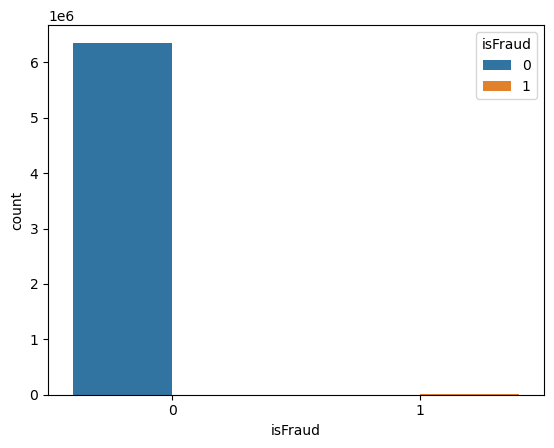

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns 
sns.countplot(x=data['isFraud'], hue=data['isFraud'])

In [13]:
legit = data[data['isFraud'] == 0]
fraud = data[data['isFraud'] == 1]
print(f"Number of Legit Transaction : {len(legit)}")
print(f"Number of Fraud Transaction : {len(fraud)}")

print("================================================")
print(f"Percentage of Legit Transaction : {(len(legit)/len(data))*100}%")
print(f"Percentage of Fraud Transaction : {(len(fraud)/len(data))*100}%")

Number of Legit Transaction : 6354407
Number of Fraud Transaction : 8213
Percentage of Legit Transaction : 99.87091795518198%
Percentage of Fraud Transaction : 0.12908204481801522%


***From Above Analysis, Here the percentage of Ligit Transaction is 99%   where as Fraud Transaction is 0.12% which is highly unbalanced***

<Axes: xlabel='isFlaggedFraud', ylabel='count'>

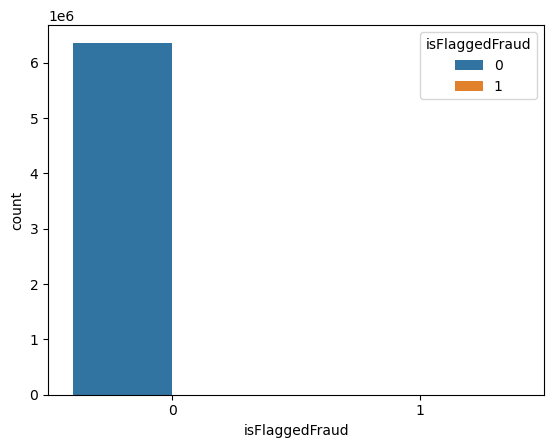

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns 
sns.countplot(x=data['isFlaggedFraud'], hue=data['isFlaggedFraud'])

In [11]:
print(f"Unique data in isFlaggedFraud : {data['isFlaggedFraud'].unique()}")
print("=====================================================================================================================")
legal = data[data["isFlaggedFraud"] == 0 ]
illegal = data[data["isFlaggedFraud"] == 1 ]
print(f"Legal attempts  : {len(legal)} ")
print(f"illegal attempts  : {len(illegal)} ")
print("======================================================================================================================")
legal_amounts = data[data["isFlaggedFraud"] == 0 ].amount.values
illegal_amounts = data[data["isFlaggedFraud"] == 1 ].amount.values
print(f"Minimum Legal Amount {min(legal_amounts)} and Maximum Legal Amount {max(legal_amounts)}")
print(f"Minimum ilLegal Amount {min(illegal_amounts)} and Maximum ilLegal Amount {max(illegal_amounts)}")

Unique data in isFlaggedFraud : [0 1]
Legal attempts  : 6362604 
illegal attempts  : 16 
Minimum Legal Amount 0.0 and Maximum Legal Amount 92445516.64
Minimum ilLegal Amount 353874.22 and Maximum ilLegal Amount 10000000.0


***isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.***

***from Above Analysis, isFlagged is not good feauters, becuase its illegal Transcation is 16 where as legal Transaction is 6362604. So i'm droping this features***

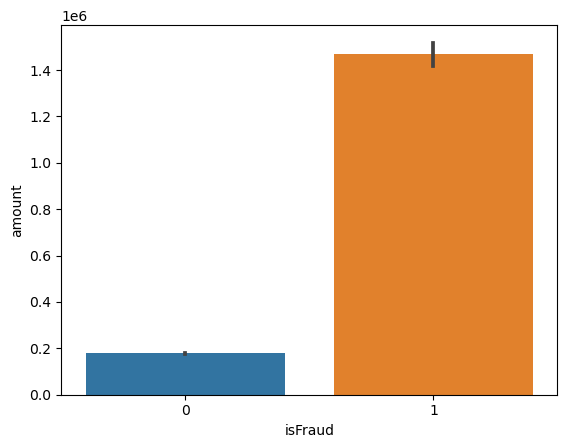

In [12]:
sns.barplot(y=data['amount'], x=data['isFraud']);

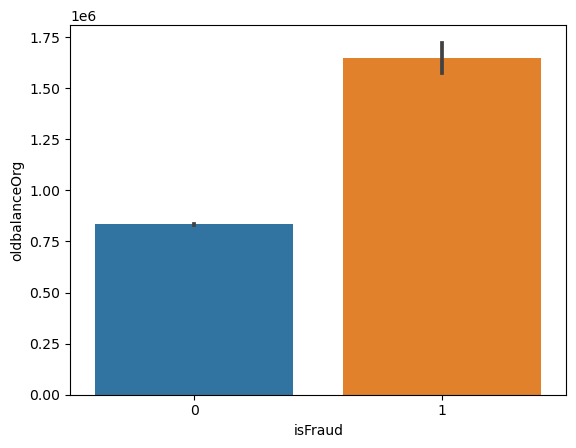

In [13]:
sns.barplot(y=data['oldbalanceOrg'], x=data['isFraud']);

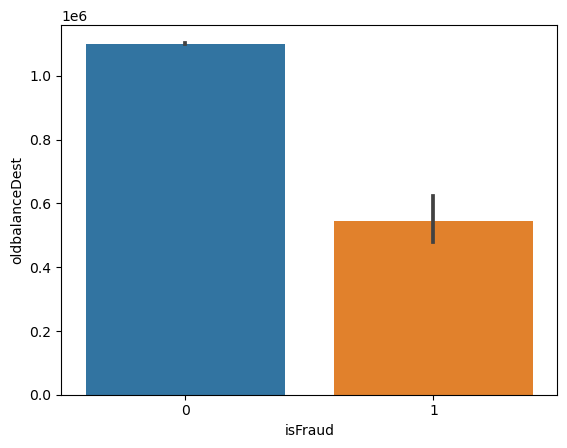

In [14]:
sns.barplot(y=data['oldbalanceDest'], x=data['isFraud']);



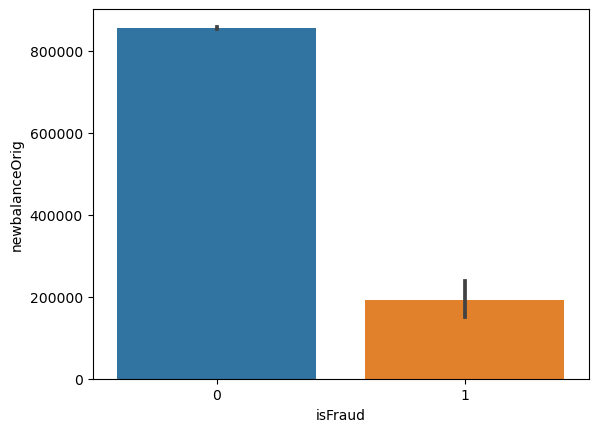

In [15]:
sns.barplot(y=data['newbalanceOrig'], x=data['isFraud']);



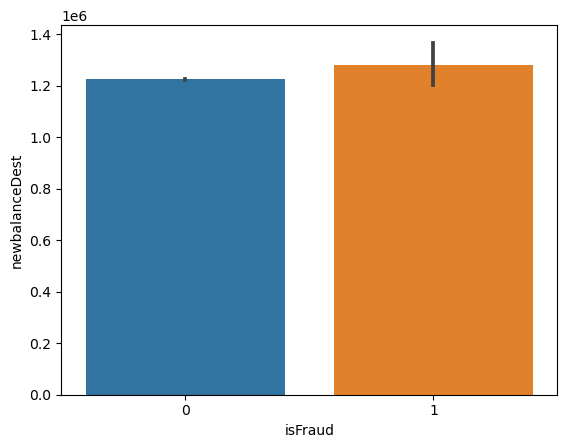

In [5]:
sns.barplot(y=data['newbalanceDest'], x=data['isFraud']);

**correlation matrix**

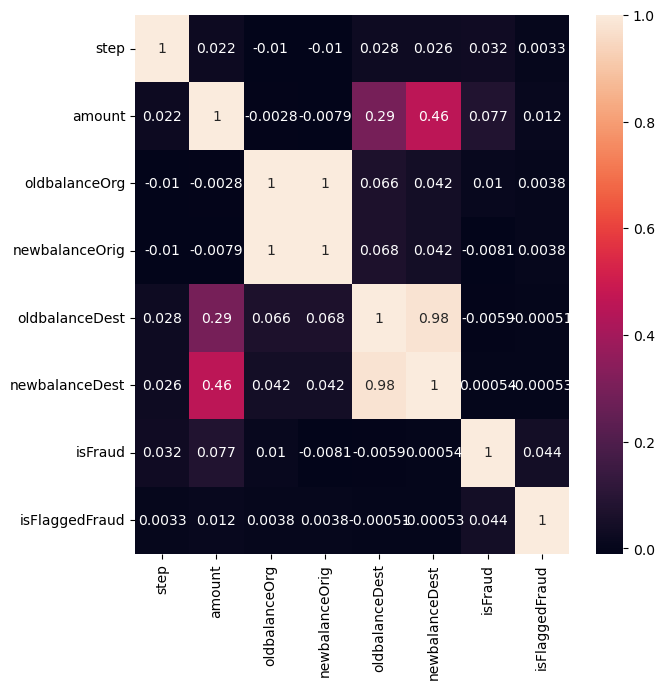

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns 

plt.figure(figsize=(7,7))
sns.heatmap(data.corr(),annot=True)
plt.show()

***It turned out that the features with positive correlation are amount, oldbalanceOrg.
And the negative correlation are: newbalanceOrig, newbalanceDest, oldbalanceDest***


In [4]:
data['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

<Axes: xlabel='amount', ylabel='type'>

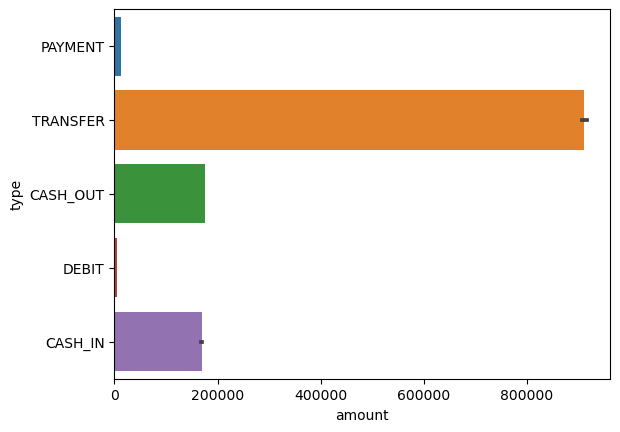

In [5]:
sns.barplot(y=data['type'], x=data['amount'])

<Axes: xlabel='amount', ylabel='type'>

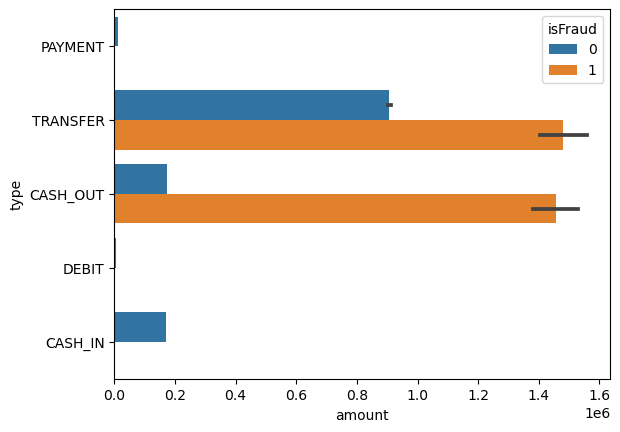

In [6]:
sns.barplot(y=data['type'], x=data['amount'],hue = data['isFraud'])

***From the figure above, we can observe that the highest number of frauds occurred in the transfer types. And the Second Highest number of fraud occured in cashout types.***


**Modeling**



In [3]:
##coverting categorical features to numerical
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
data.type=label.fit_transform(data['type'])
data.nameOrig=label.fit_transform(data['nameOrig'])
data.nameDest=label.fit_transform(data['nameDest'])

In [4]:
x = data.iloc[:,0:9]
y = data.iloc[:,9]

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [6]:
from sklearn.metrics  import balanced_accuracy_score, precision_score, classification_report
from sklearn.metrics  import recall_score, f1_score, make_scorer, cohen_kappa_score

In [12]:
from sklearn.linear_model import LogisticRegression

log_r = LogisticRegression()
log_r.fit(X_train,y_train)
y_pred = log_r.predict(X_test)

accuracy = balanced_accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
kappa = cohen_kappa_score(y_test, y_pred)

print(f"Logistic Regression ")
print(f"Accuracy : {np.round(accuracy,3)}")
print(f"precision: {np.round(precision,3)}")
print(f"recall : {np.round(recall,3)}")
print(f"kappa : {np.round(kappa,3)}")

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression 
Accuracy : 0.715
precision: 0.768
recall : 0.43
kappa : 0.551


In [7]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)

accuracy_rfc = balanced_accuracy_score(y_test, y_pred)
precision_rfc = precision_score(y_test, y_pred)
recall_rfc = recall_score(y_test, y_pred)
f1_rfc = f1_score(y_test, y_pred)
kappa_rfc = cohen_kappa_score(y_test, y_pred)

print(f"Random ForestClassifier ")
print(f"Accuracy : {np.round(accuracy_rfc,3)}")
print(f"precision: {np.round(precision_rfc,3)}")
print(f"recall : {np.round(recall_rfc,3)}")
print(f"F1 Score : {np.round(f1_rfc,3)}")
print(f"kappa : {np.round(kappa_rfc,3)}")

Random ForestClassifier 
Accuracy : 0.884
precision: 0.991
recall : 0.768
F1 Score : 0.865
kappa : 0.865


In [8]:
from sklearn.tree import DecisionTreeRegressor
dtc =  DecisionTreeRegressor()
dtc.fit(X_train,y_train)
y_pred = dtc.predict(X_test)

accuracy_dtc = balanced_accuracy_score(y_test, y_pred)
precision_dtc = precision_score(y_test, y_pred)
recall_dtc = recall_score(y_test, y_pred)
f1_dtc = f1_score(y_test, y_pred)
kappa_dtc = cohen_kappa_score(y_test, y_pred)

print(f"Decision Tree Regressor")
print(f"Accuracy : {np.round(accuracy_dtc,3)}")
print(f"precision: {np.round(precision_dtc,3)}")
print(f"recall : {np.round(recall_dtc,3)}")
print(f"F1 Score : {np.round(f1_dtc,3)}")
print(f"kappa : {np.round(kappa_dtc,3)}")

Decision Tree Regressor
Accuracy : 0.929
precision: 0.89
recall : 0.859
F1 Score : 0.874
kappa : 0.874


In [14]:
from sklearn.naive_bayes import GaussianNB
gnb =  GaussianNB()
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)

accuracy_gnb = balanced_accuracy_score(y_test, y_pred)
precision_gnb = precision_score(y_test, y_pred)
recall_gnb = recall_score(y_test, y_pred)
f1_gnb = f1_score(y_test, y_pred)
kappa_gnb = cohen_kappa_score(y_test, y_pred)

print(f"GaussianNB")
print(f"Accuracy : {np.round(accuracy_gnb,3)}")
print(f"precision: {np.round(accuracy_gnb,3)}")
print(f"recall : {np.round(precision_gnb,3)}")
print(f"F1 Score : {np.round(f1_gnb,3)}")
print(f"kappa : {np.round(kappa_gnb,3)}")

GaussianNB
Accuracy : 0.586
precision: 0.586
recall : 0.037
F1 Score : 0.062
kappa : 0.06


***Decision Tree
Classifier and Random Forest Classifier gave us the best results being able to detect fraud transactions. There is no perfect model and there will always be a trade-off 
between precision and recall***

***Describe your fraud detection model in elaboration.***

the main problem with imbalanced dataset prediction is how accurately are we actually predicting both majority and minority class. Model should not be biased to detect only the majority class but should give equal weight or importance towards the minority class too.There is no perfect model and there will always be a trade-off between precision and recall.
In Decision Tree Classifier, Accuracy : 0.929  and precision: 0.89 
In Random Forest ClassifierDecision Tree Classifier, Accuracy : 0.884 and precision: 0.991
for this DataSet Decision Tree Classifier and Random Forest Classifier is good model.

***What are the key factors that predict fraudulent customer?**
The accuracy may be good enough for a well-balanced class but not ideal for the imbalanced class problem. The other metrics such as precision is the measure of how accurate the classifier’s prediction of a specific class and recall is the measure of the classifier’s ability to identify a class. For an imbalanced class dataset F1 score is a more appropriate metric.

***Do these factors make sense? If yes, How? If not, How not?**
There are many models and Techniques which gives Best result like SMOTE, resampling etc. 
And Yes, Decision Tree Classifier and Random Forest Classifier  is one of the good models that gives best reult to find Fraud Transactations.

***What kind of prevention should be adopted while company update its infrastructure***
1) Digital verification of documents using integrated technology is an essential step in the prevention of fraud. Integrating AI and Machine Learning enabled technology has been a game changer for companies all over the world, and the banking sector will only benefit from incorporating these into its systems.
2) Check the entities for any bad news.
3) Banking institutions should preferably construct or integrate advanced fraud prediction models to proactively detect abnormalities and weed out questionable applications. 

***Assuming these actions have been implemented, how would you determine if they work***
if these models are implemented they will give 90% better result